In [1]:
import FuzzySystem as fs
import numpy as np

## Basic Tipping Problem

*** Inputs ***
Service


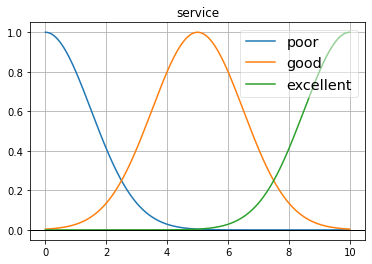

Food


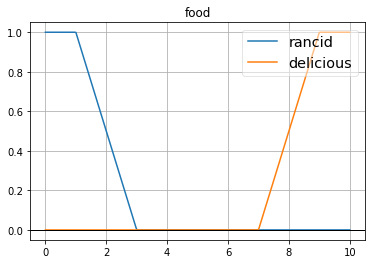

*** Outputs ***
Tip


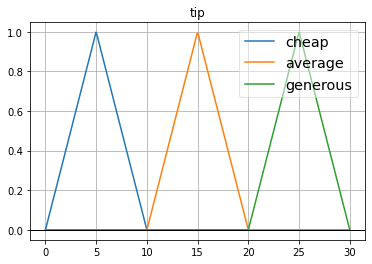

Inputs:
service: [8.183, 8.2]
food: [8.59, 4]
 IF service is poor and food is rancid THEN tip is cheap, fs = [0. 0.] with weight = 1.00
 IF service is good or food is delicious THEN tip is average, fs = [0.79 0.1 ] with weight = 1.00
 IF service is excellent or food is delicious THEN tip is generous, fs = [0.79 0.49] with weight = 1.00


In [2]:
#INPUTS
print('*** Inputs ***')
service_poor = fs.FuzzySet('poor', fs.Gaussmf([1.5, 0]))
service_good = fs.FuzzySet('good', fs.Gaussmf([1.5, 5]))
service_excellent = fs.FuzzySet('excellent', fs.Gaussmf([1.5, 10]))
service = fs.FuzzyVariable('service',[service_poor, service_good, service_excellent], universe=[0, 10])
print('Service')
service.show()

food_rancid = fs.FuzzySet('rancid', fs.Trapmf([0,0,1,3]))
food_delicious = fs.FuzzySet('delicious', fs.Trapmf([7,9,10,10]))
food = fs.FuzzyVariable('food', [food_rancid, food_delicious], universe=[0, 10])
print('Food')
food.show()

#OUTPUT
print('*** Outputs ***')
tip_cheap = fs.FuzzySet('cheap', fs.Trimf([0,5,10]))
tip_avg = fs.FuzzySet('average', fs.Trimf([10,15,20]))
tip_generous = fs.FuzzySet('generous', fs.Trimf([20,25,30]))
tip = fs.FuzzyVariable('tip', [tip_cheap, tip_avg, tip_generous], universe=[0, 30])
print('Tip')
tip.show()

#RULES


ant1  = fs.Antecedent(service['poor'], conector='min')
ant1.add(food['rancid'])
cont1 = fs.Consequent([tip['cheap']])
rule1 = fs.FuzzyRule(ant1, cont1)

ant2  = fs.Antecedent(service['good'] | food['delicious'])
cont2 = fs.Consequent([tip['average']])
rule2 = fs.FuzzyRule(ant2, cont2)

rule3 = fs.FuzzyRule(fs.Antecedent(service['excellent'] | food['delicious']),
                     fs.Consequent([ tip['generous'] ]))

#Building the FIS

fis = fs.FuzzyInferenceSystem([rule1, rule2, rule3], 
                              and_op='min',
                              or_op='max')

#FIS Evaluation
inputs = {'service':[8.183, 8.2], 'food':[8.59,4]}
result = fis.eval(inputs, verbose=True)

Fuzzy output
Instance: 0



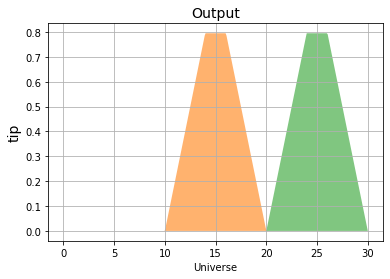

Instance: 1



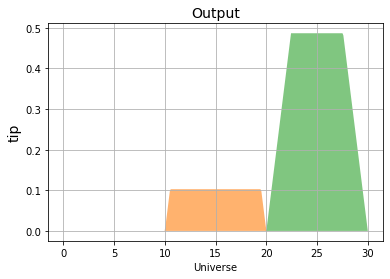

In [3]:
print("Fuzzy output")
#instances
for i in range(len(inputs['service'])):
    print("Instance: {}\n".format(i))
    result.show(nout=i)

In [4]:
print('Defuzzification using Centroid method:')
fs.Centroid(result).eval()

Defuzzification using Centroid method:


[{'tip': array(20.)}, {'tip': array(22.91)}]

Defuzzification using a list of methods:
Instance: 0

Centroid=20.000
Center of Sets=20.000
Heights=19.986
Modified Heights=19.986
Mean Of Maximum=19.986
Least Of Maximum=25.960
First Of Maximum=14.011


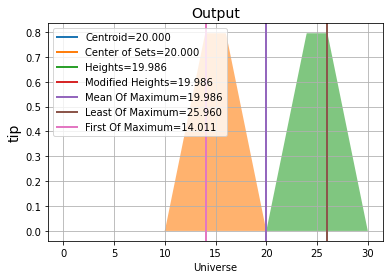

Instance: 1

Centroid=22.907
Center of Sets=23.257
Heights=23.233
Modified Heights=23.233
Mean Of Maximum=24.971
Least Of Maximum=27.507
First Of Maximum=22.436


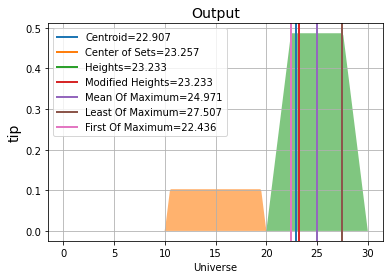

In [5]:
print('Defuzzification using a list of methods:')


Defuzzification_methods = [fs.Centroid,
                           fs.CenterOfSets,  
                           fs.Heights, 
                           fs.ModifiedHeights, 
                           fs.MeanOfMaximum, 
                           fs.LastOfMaximum, 
                           fs.FirstOfMaximum]
#instances
for i in range(2):
    print("Instance: {}\n".format(i))
    result.show(Defuzzification_methods, nout=i)

In [6]:
# print('Activation of fuzzy sets for the given inputs')
# for i,rule in enumerate(result.fuzzysets):
#     print('Rule: ', i+1)
#     for y, fs_array in rule.items():
#         print('Output: ', y)
#         for fuzzyset in fs_array:
#             fuzzyset.show()

# Non-singleton Input

In [7]:
fis.show_rules()



Fuzzy System Rules:
IF service is poor and food is rancid THEN tip is cheap
IF service is good or food is delicious THEN tip is average
IF service is excellent or food is delicious THEN tip is generous


In [8]:
nsinp1_values = np.linspace(0,10,50)
nsinp1 = fs.NonSingleton(fs.Gaussmf([2,5]), nsinp1_values)

nsinp2_values = np.linspace(0,10,50)
nsinp2 = fs.NonSingleton(fs.Gaussmf([2,5]), nsinp2_values)

nsinputs = {'service':nsinp1, 'food':nsinp2}

resultns = fis.eval(nsinputs)

Defuzzification using Centroid method:


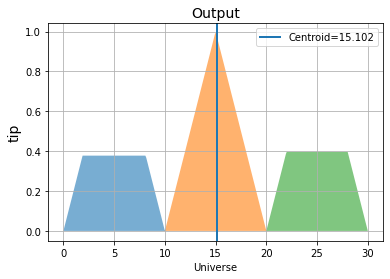

In [9]:
print('Defuzzification using Centroid method:')
resultns.show(fs.Centroid)

Defuzzification using a list of methods:
Centroid=15.102
Center of Sets=15.106
Heights=15.121
Modified Heights=15.121
Mean Of Maximum=15.043
Least Of Maximum=15.043
First Of Maximum=15.043


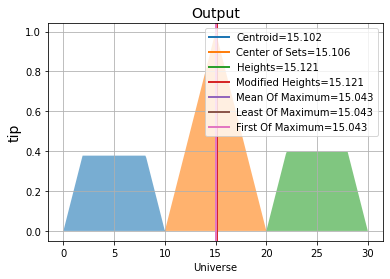

In [10]:
print('Defuzzification using a list of methods:')
resultns.show(Defuzzification_methods)
